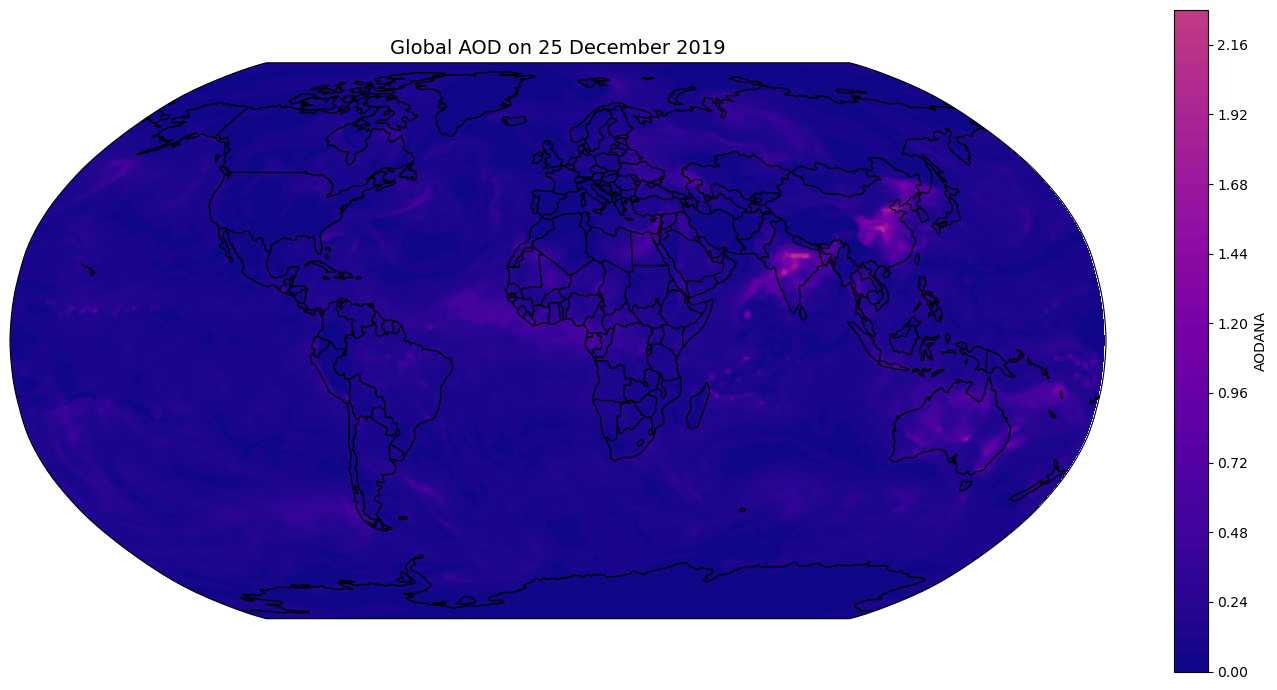

In [15]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset
import numpy as np
import os

# === File path ===
aod_file = r"C:\Users\Nur Izfarwiza\Documents\Dissertation\AOD\MERRA2_400.inst3_2d_gas_Nx.20191225.nc4"
if not os.path.exists(aod_file):
    raise FileNotFoundError("AOD file for 25 Dec 2019 not found")

# === Load AOD Data ===
ds = Dataset(aod_file)
aod_data = ds.variables["AODANA"][:]  # shape: (8, 361, 576)
aod_lats = ds.variables["lat"][:]
aod_lons = ds.variables["lon"][:]
aod_lon_grid, aod_lat_grid = np.meshgrid(aod_lons, aod_lats)

# === Choose one time step or average ===
# Option 1: Single time step
aod_slice = np.nan_to_num(aod_data[0], nan=0.0)

# Option 2 (optional): Daily average
# aod_slice = np.nanmean(aod_data, axis=0)

# === Plot ===
plt.figure(figsize=(14, 7))
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Contour plot
cf = ax.contourf(
    aod_lon_grid, aod_lat_grid, aod_slice,
    levels=40,
    cmap="plasma",
    vmin=0.0,          # Minimum AOD value for all plots
    vmax=5.0,          # Adjust this upper bound based on your data range
    transform=ccrs.PlateCarree()
)

# Colorbar
cb = plt.colorbar(cf, ax=ax, orientation="vertical", label="AODANA")
plt.title("Global AOD on 25 December 2019", fontsize=14)
plt.tight_layout()
plt.show()

ds.close()


In [2]:
from netCDF4 import Dataset
import numpy as np
import os

# === Load AOD Data for 25 December 2019 ===
aod_path = r"C:\Users\Nur Izfarwiza\Documents\Dissertation\AOD\MERRA2_400.inst3_2d_gas_Nx.20191225.nc4"
if not os.path.exists(aod_path):
    raise FileNotFoundError("AOD file not found.")

ds = Dataset(aod_path)
aod_data = ds.variables["AODANA"][:]  # shape: (8, 361, 576)
ds.close()

# === Flatten and Analyse ===
aod_flat = aod_data.flatten()
aod_flat = aod_flat[~np.isnan(aod_flat)]  # Remove NaNs

# === Summary Statistics ===
min_aod = np.min(aod_flat)
max_aod = np.max(aod_flat)
mean_aod = np.mean(aod_flat)
median_aod = np.median(aod_flat)
percentiles = np.percentile(aod_flat, [25, 50, 75, 90, 95, 99])

print(f"🌏 AOD Summary on 25 Dec 2019:")
print(f"Min AOD      : {min_aod:.4f}")
print(f"Max AOD      : {max_aod:.4f}")
print(f"Mean AOD     : {mean_aod:.4f}")
print(f"Median AOD   : {median_aod:.4f}")
print(f"Percentiles  : 25%={percentiles[0]:.4f}, 50%={percentiles[1]:.4f}, "
      f"75%={percentiles[2]:.4f}, 90%={percentiles[3]:.4f}, "
      f"95%={percentiles[4]:.4f}, 99%={percentiles[5]:.4f}")


🌏 AOD Summary on 25 Dec 2019:
Min AOD      : -0.0001
Max AOD      : 2.7273
Mean AOD     : 0.1103
Median AOD   : 0.0821
Percentiles  : 25%=0.0535, 50%=0.0821, 75%=0.1299, 90%=0.2095, 95%=0.2870, 99%=0.5169


C:\Users\Nur Izfarwiza\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
C:\Users\Nur Izfarwiza\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


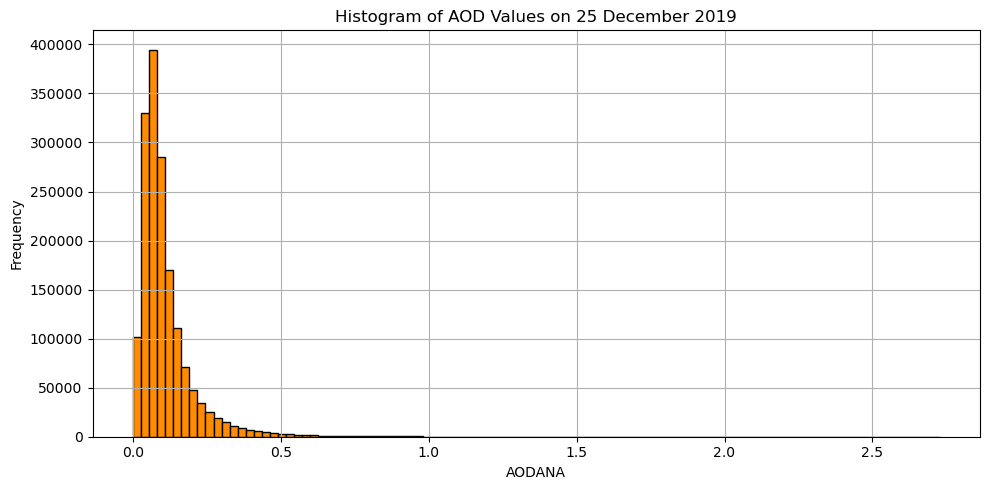

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(aod_flat, bins=100, color='darkorange', edgecolor='black')
plt.title("Histogram of AOD Values on 25 December 2019")
plt.xlabel("AODANA")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


In [4]:
from netCDF4 import Dataset
import numpy as np

# === File path ===
file_path = r"C:\Users\Nur Izfarwiza\Documents\Dissertation\AOD\MERRA2_400.inst3_2d_gas_Nx.20191225.nc4"
ds = Dataset(file_path)

# === Extract lat/lon arrays ===
lats = ds.variables["lat"][:]
lons = ds.variables["lon"][:]

# === Find indices for Victoria region ===
lat_mask = (lats >= -39) & (lats <= -34)
lon_mask = (lons >= 140.5) & (lons <= 150)

lat_indices = np.where(lat_mask)[0]
lon_indices = np.where(lon_mask)[0]

# === Load AOD data ===
aod = ds.variables["AODANA"][:]  # shape: (8, lat, lon)
ds.close()

# === Extract subregion over Victoria ===
aod_vic = aod[:, lat_indices[0]:lat_indices[-1]+1, lon_indices[0]:lon_indices[-1]+1]
aod_vic_flat = aod_vic.flatten()
aod_vic_flat = aod_vic_flat[~np.isnan(aod_vic_flat)]

# === Statistics ===
min_val = np.min(aod_vic_flat)
max_val = np.max(aod_vic_flat)
mean_val = np.mean(aod_vic_flat)
median_val = np.median(aod_vic_flat)
percentiles = np.percentile(aod_vic_flat, [25, 50, 75, 90, 95, 99])

# === Print Results ===
print(f"📍 AOD Statistics for Victoria (25 Dec 2019)")
print(f"Min     : {min_val:.4f}")
print(f"Max     : {max_val:.4f}")
print(f"Mean    : {mean_val:.4f}")
print(f"Median  : {median_val:.4f}")
print(f"Percentiles: 25%={percentiles[0]:.4f}, 50%={percentiles[1]:.4f}, "
      f"75%={percentiles[2]:.4f}, 90%={percentiles[3]:.4f}, "
      f"95%={percentiles[4]:.4f}, 99%={percentiles[5]:.4f}")


📍 AOD Statistics for Victoria (25 Dec 2019)
Min     : 0.0511
Max     : 2.3729
Mean    : 0.2874
Median  : 0.1613
Percentiles: 25%=0.1148, 50%=0.1613, 75%=0.3982, 90%=0.5807, 95%=0.7972, 99%=1.5132


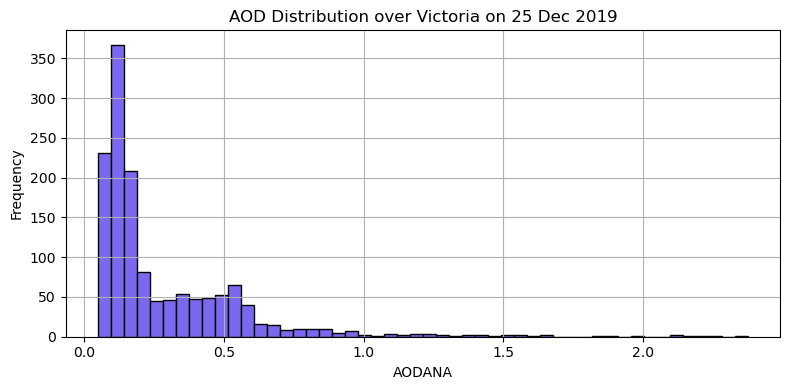

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.hist(aod_vic_flat, bins=50, color='mediumslateblue', edgecolor='black')
plt.title("AOD Distribution over Victoria on 25 Dec 2019")
plt.xlabel("AODANA")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


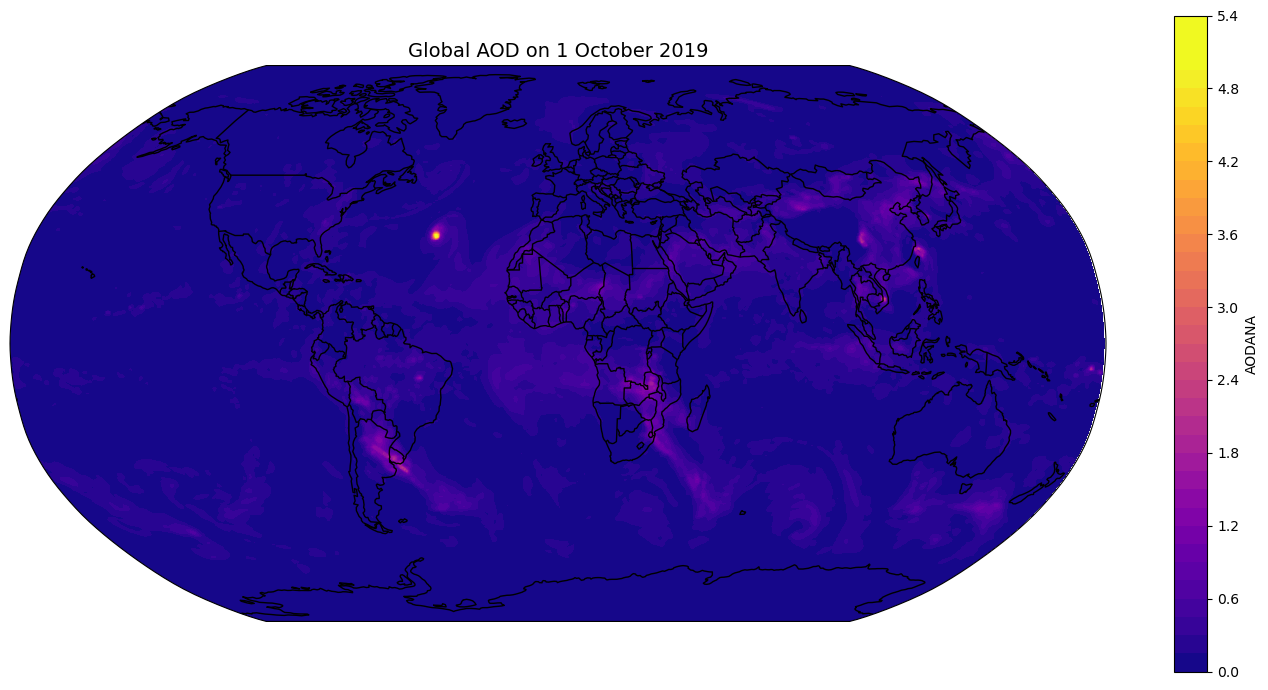

In [16]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset
import numpy as np
import os

# === File path ===
aod_file = r"C:\Users\Nur Izfarwiza\Documents\Dissertation\AOD\MERRA2_400.inst3_2d_gas_Nx.20191001.nc4"
if not os.path.exists(aod_file):
    raise FileNotFoundError("AOD file for 25 Dec 2019 not found")

# === Load AOD Data ===
ds = Dataset(aod_file)
aod_data = ds.variables["AODANA"][:]  # shape: (8, 361, 576)
aod_lats = ds.variables["lat"][:]
aod_lons = ds.variables["lon"][:]
aod_lon_grid, aod_lat_grid = np.meshgrid(aod_lons, aod_lats)

# === Choose one time step or average ===
# Option 1: Single time step
aod_slice = np.nan_to_num(aod_data[0], nan=0.0)

# Option 2 (optional): Daily average
# aod_slice = np.nanmean(aod_data, axis=0)

# === Plot ===
plt.figure(figsize=(14, 7))
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Contour plot
cf = ax.contourf(
    aod_lon_grid, aod_lat_grid, aod_slice,
    levels=40,
    cmap="plasma",
    vmin=0.0,          # Minimum AOD value for all plots
    vmax=5.0,          # Adjust this upper bound based on your data range
    transform=ccrs.PlateCarree()
)

# Colorbar
cb = plt.colorbar(cf, ax=ax, orientation="vertical", label="AODANA")

plt.title("Global AOD on 1 October 2019", fontsize=14)
plt.tight_layout()
plt.show()

ds.close()


In [7]:
from netCDF4 import Dataset
import numpy as np
import os

# === Load AOD Data for 25 December 2019 ===
aod_path = r"C:\Users\Nur Izfarwiza\Documents\Dissertation\AOD\MERRA2_400.inst3_2d_gas_Nx.20191001.nc4"
if not os.path.exists(aod_path):
    raise FileNotFoundError("AOD file not found.")

ds = Dataset(aod_path)
aod_data = ds.variables["AODANA"][:]  # shape: (8, 361, 576)
ds.close()

# === Flatten and Analyse ===
aod_flat = aod_data.flatten()
aod_flat = aod_flat[~np.isnan(aod_flat)]  # Remove NaNs

# === Summary Statistics ===
min_aod = np.min(aod_flat)
max_aod = np.max(aod_flat)
mean_aod = np.mean(aod_flat)
median_aod = np.median(aod_flat)
percentiles = np.percentile(aod_flat, [25, 50, 75, 90, 95, 99])

print(f"🌏 AOD Summary on 1 October 2019:")
print(f"Min AOD      : {min_aod:.4f}")
print(f"Max AOD      : {max_aod:.4f}")
print(f"Mean AOD     : {mean_aod:.4f}")
print(f"Median AOD   : {median_aod:.4f}")
print(f"Percentiles  : 25%={percentiles[0]:.4f}, 50%={percentiles[1]:.4f}, "
      f"75%={percentiles[2]:.4f}, 90%={percentiles[3]:.4f}, "
      f"95%={percentiles[4]:.4f}, 99%={percentiles[5]:.4f}")


🌏 AOD Summary on 1 October 2019:
Min AOD      : 0.0027
Max AOD      : 5.2770
Mean AOD     : 0.1244
Median AOD   : 0.0908
Percentiles  : 25%=0.0575, 50%=0.0908, 75%=0.1443, 90%=0.2455, 95%=0.3439, 99%=0.6150


C:\Users\Nur Izfarwiza\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
C:\Users\Nur Izfarwiza\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


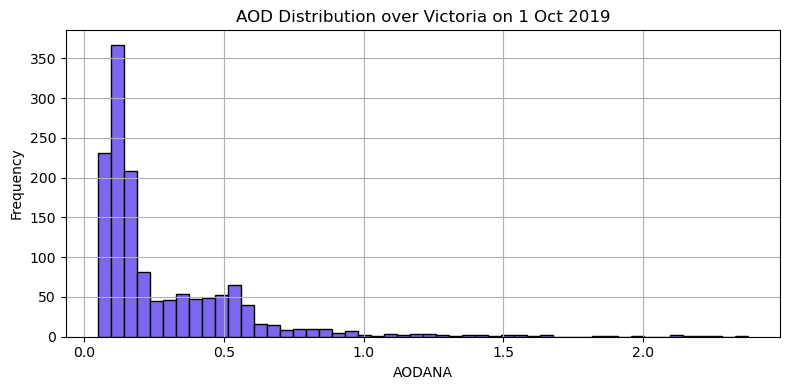

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.hist(aod_vic_flat, bins=50, color='mediumslateblue', edgecolor='black')
plt.title("AOD Distribution over Victoria on 1 Oct 2019")
plt.xlabel("AODANA")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Nur Izfarwiza\AppData\Local\Temp\ipykernel_38188\2397387311.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


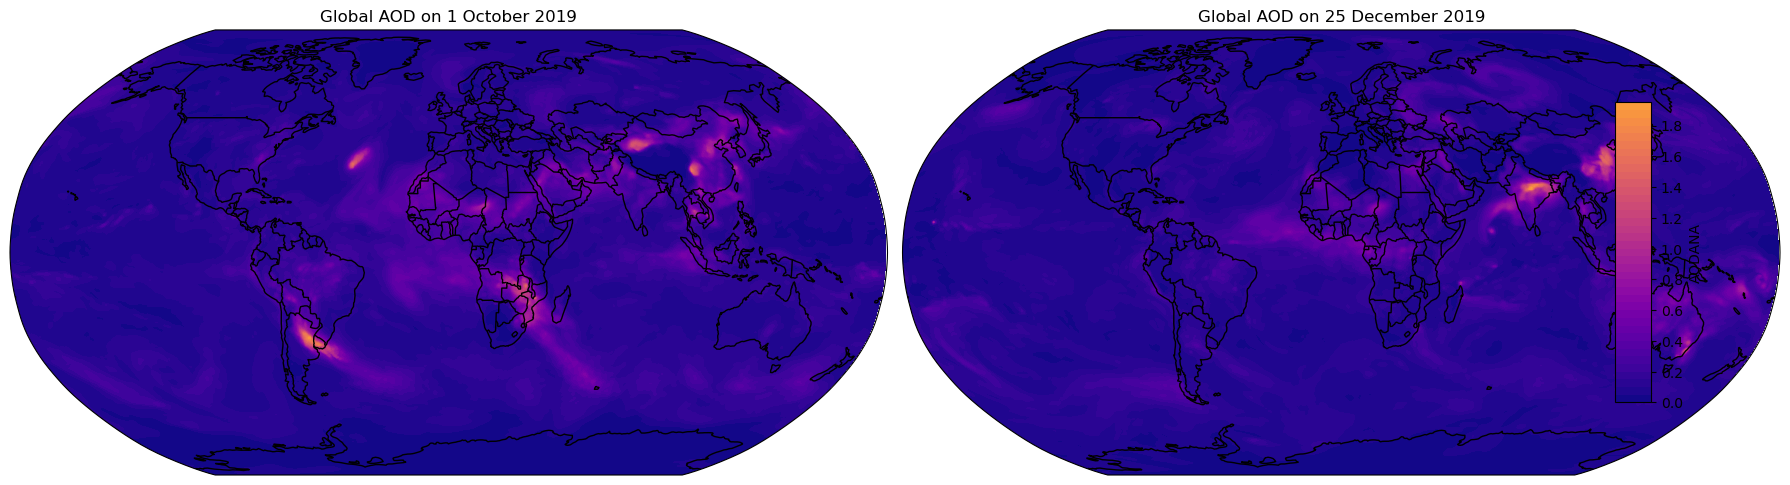

In [19]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset
import numpy as np
import os

# === File setup ===
dates = ['20191001', '20191225']
titles = ['Global AOD on 1 October 2019', 'Global AOD on 25 December 2019']
data_dir = r"C:\Users\Nur Izfarwiza\Documents\Dissertation\AOD"
vmin, vmax = 0.0, 2.5

# === Create figure with space for colour bar ===
fig, axes = plt.subplots(1, 2, figsize=(18, 6), subplot_kw={'projection': ccrs.Robinson()})
plt.subplots_adjust(right=0.88)  # Leave space for the colourbar on the right

# Add dedicated colourbar axis
cbar_ax = fig.add_axes([0.90, 0.25, 0.02, 0.5])  # [left, bottom, width, height]

# === Loop through each file ===
for i, date_str in enumerate(dates):
    filepath = os.path.join(data_dir, f"MERRA2_400.inst3_2d_gas_Nx.{date_str}.nc4")
    ds = Dataset(filepath)
    aod_data = ds.variables["AODANA"][:]
    aod_lats = ds.variables["lat"][:]
    aod_lons = ds.variables["lon"][:]
    aod_slice = np.nanmean(aod_data, axis=0)
    ds.close()

    lon_grid, lat_grid = np.meshgrid(aod_lons, aod_lats)

    ax = axes[i]
    ax.set_global()
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    cf = ax.contourf(lon_grid, lat_grid, aod_slice, levels=40, cmap="plasma",
                     vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree())
    ax.set_title(titles[i])

# Shared colour bar
fig.colorbar(cf, cax=cbar_ax, orientation='vertical', label='AODANA')

plt.tight_layout()
plt.show()


C:\Users\Nur Izfarwiza\AppData\Local\Temp\ipykernel_38188\3553854080.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


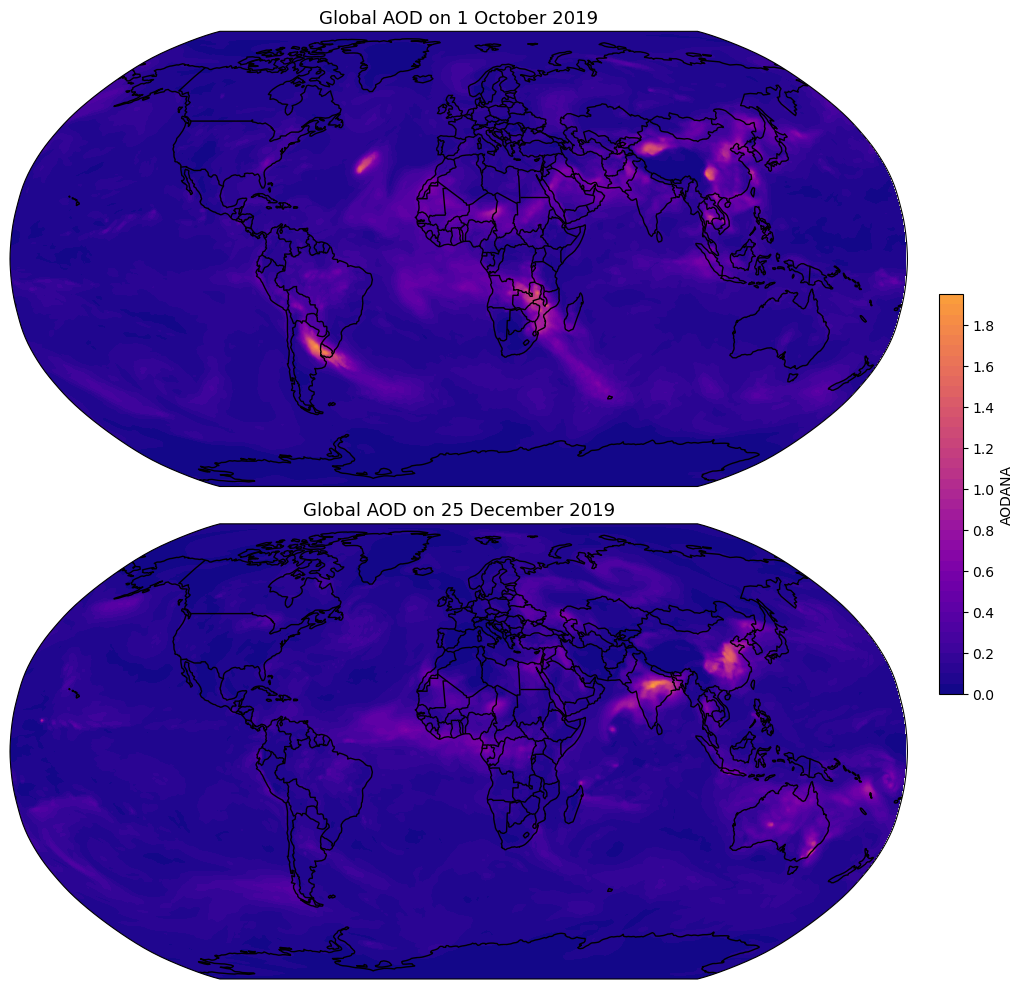

In [20]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset
import numpy as np
import os

# === File setup ===
dates = ['20191001', '20191225']
titles = ['Global AOD on 1 October 2019', 'Global AOD on 25 December 2019']
data_dir = r"C:\Users\Nur Izfarwiza\Documents\Dissertation\AOD"
vmin, vmax = 0.0, 2.5

# === Create vertical figure layout ===
fig, axes = plt.subplots(2, 1, figsize=(12, 10), subplot_kw={'projection': ccrs.Robinson()})
plt.subplots_adjust(right=0.88)  # Leave room on the right for the colour bar

# Add colourbar axis to the right
cbar_ax = fig.add_axes([0.90, 0.30, 0.02, 0.4])  # [left, bottom, width, height]

# === Loop through each AOD file ===
for i, date_str in enumerate(dates):
    file_path = os.path.join(data_dir, f"MERRA2_400.inst3_2d_gas_Nx.{date_str}.nc4")
    ds = Dataset(file_path)
    aod_data = ds.variables["AODANA"][:]  # shape (8, lat, lon)
    aod_lats = ds.variables["lat"][:]
    aod_lons = ds.variables["lon"][:]
    aod_slice = np.nanmean(aod_data, axis=0)  # Average of all time steps that day
    ds.close()

    lon_grid, lat_grid = np.meshgrid(aod_lons, aod_lats)
    ax = axes[i]
    ax.set_global()
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.LAND, facecolor='lightgray')

    cf = ax.contourf(
        lon_grid, lat_grid, aod_slice,
        levels=40,
        cmap="plasma",
        vmin=vmin, vmax=vmax,
        transform=ccrs.PlateCarree()
    )
    ax.set_title(titles[i], fontsize=13)

# === Shared colourbar ===
fig.colorbar(cf, cax=cbar_ax, orientation='vertical', label='AODANA')

plt.tight_layout()
plt.show()


In [21]:
from netCDF4 import Dataset
import numpy as np
import os

# === Victoria Bounding Box ===
lon_min, lon_max = 140.5, 150
lat_min, lat_max = -39, -34

# === File paths ===
aod_files = {
    "1 October 2019": r"C:\Users\Nur Izfarwiza\Documents\Dissertation\AOD\MERRA2_400.inst3_2d_gas_Nx.20191001.nc4",
    "25 December 2019": r"C:\Users\Nur Izfarwiza\Documents\Dissertation\AOD\MERRA2_400.inst3_2d_gas_Nx.20191225.nc4"
}

# === Loop through dates ===
for date_label, file_path in aod_files.items():
    if not os.path.exists(file_path):
        print(f"⚠️ File not found for {date_label}")
        continue

    ds = Dataset(file_path)
    aod_data = ds.variables["AODANA"][:]  # shape: (8, 361, 576)
    lats = ds.variables["lat"][:]
    lons = ds.variables["lon"][:]
    ds.close()

    # Find lat/lon indices for Victoria
    lat_indices = np.where((lats >= lat_min) & (lats <= lat_max))[0]
    lon_indices = np.where((lons >= lon_min) & (lons <= lon_max))[0]

    # Extract Victoria region and flatten
    aod_vic = aod_data[:, lat_indices[:, None], lon_indices]
    aod_flat = aod_vic.flatten()
    aod_flat = aod_flat[~np.isnan(aod_flat)]

    # === Statistics ===
    min_aod = np.min(aod_flat)
    max_aod = np.max(aod_flat)
    mean_aod = np.mean(aod_flat)
    median_aod = np.median(aod_flat)
    percentiles = np.percentile(aod_flat, [25, 50, 75, 90, 95, 99])

    print(f"\n📍 AOD Summary for Victoria on {date_label}:")
    print(f"Min AOD      : {min_aod:.4f}")
    print(f"Max AOD      : {max_aod:.4f}")
    print(f"Mean AOD     : {mean_aod:.4f}")
    print(f"Median AOD   : {median_aod:.4f}")
    print(f"Percentiles  : 25%={percentiles[0]:.4f}, 50%={percentiles[1]:.4f}, "
          f"75%={percentiles[2]:.4f}, 90%={percentiles[3]:.4f}, "
          f"95%={percentiles[4]:.4f}, 99%={percentiles[5]:.4f}")



📍 AOD Summary for Victoria on 1 October 2019:
Min AOD      : 0.0423
Max AOD      : 0.2153
Mean AOD     : 0.0831
Median AOD   : 0.0809
Percentiles  : 25%=0.0687, 50%=0.0809, 75%=0.0936, 90%=0.1069, 95%=0.1199, 99%=0.1632

📍 AOD Summary for Victoria on 25 December 2019:
Min AOD      : 0.0511
Max AOD      : 2.3729
Mean AOD     : 0.2874
Median AOD   : 0.1613
Percentiles  : 25%=0.1148, 50%=0.1613, 75%=0.3982, 90%=0.5807, 95%=0.7972, 99%=1.5132


C:\Users\Nur Izfarwiza\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
C:\Users\Nur Izfarwiza\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


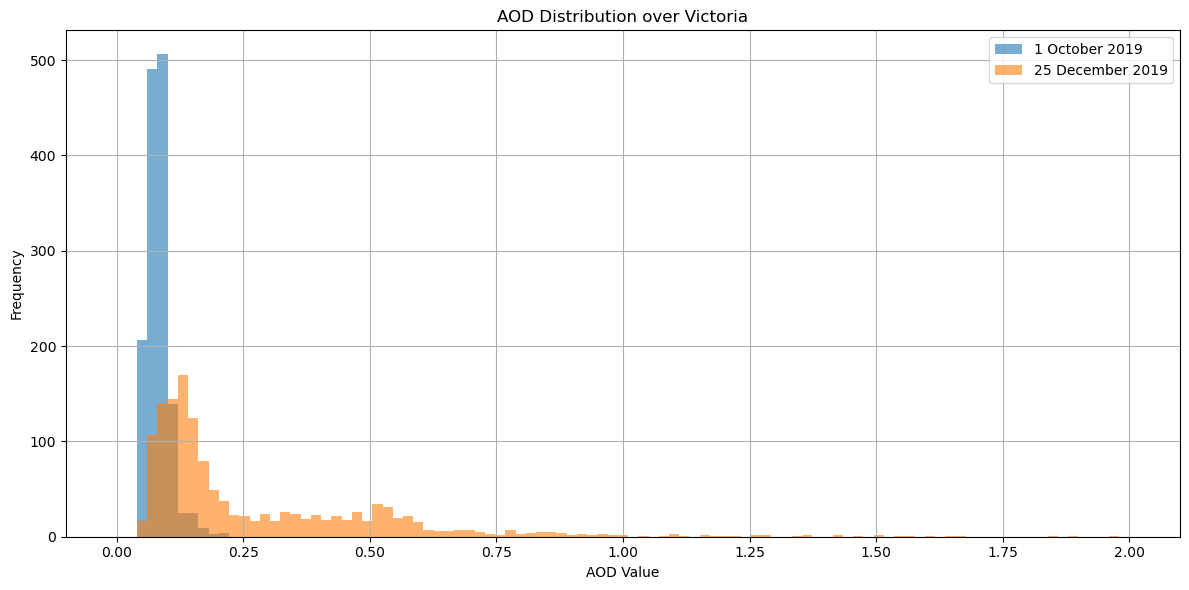

In [23]:
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import numpy as np
import os

# === Victoria Bounding Box ===
lon_min, lon_max = 140.5, 150
lat_min, lat_max = -39, -34

# === File paths ===
aod_files = {
    "1 October 2019": r"C:\Users\Nur Izfarwiza\Documents\Dissertation\AOD\MERRA2_400.inst3_2d_gas_Nx.20191001.nc4",
    "25 December 2019": r"C:\Users\Nur Izfarwiza\Documents\Dissertation\AOD\MERRA2_400.inst3_2d_gas_Nx.20191225.nc4"
}


# === Storage for plotting ===
aod_hist_data = {}

# === Loop through dates ===
for date_label, file_path in aod_files.items():
    ds = Dataset(file_path)
    aod_data = ds.variables["AODANA"][:]  # shape: (8, 361, 576)
    lats = ds.variables["lat"][:]
    lons = ds.variables["lon"][:]
    ds.close()

    # Find lat/lon indices for Victoria
    lat_indices = np.where((lats >= lat_min) & (lats <= lat_max))[0]
    lon_indices = np.where((lons >= lon_min) & (lons <= lon_max))[0]

    # Extract Victoria region and flatten
    aod_vic = aod_data[:, lat_indices[:, None], lon_indices]
    aod_flat = aod_vic.flatten()
    aod_flat = aod_flat[~np.isnan(aod_flat)]

    aod_hist_data[date_label] = aod_flat

# === Plot Histograms ===
plt.figure(figsize=(12, 6))
bins = np.linspace(0, 2, 100)
for label, data in aod_hist_data.items():
    plt.hist(data, bins=bins, alpha=0.6, label=label)

plt.title("AOD Distribution over Victoria")
plt.xlabel("AOD Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Nur Izfarwiza\AppData\Local\Temp\ipykernel_38188\2392854171.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([oct_aod, dec_aod], vert=True, patch_artist=True, labels=['1 Oct', '25 Dec'])


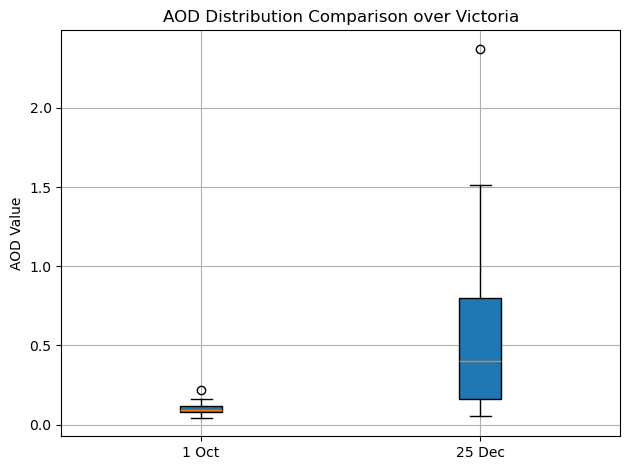

In [24]:
import matplotlib.pyplot as plt

# Replace with your data
oct_aod = [0.0423, 0.2153, 0.0831, 0.0809, 0.0687, 0.0936, 0.1069, 0.1199, 0.1632]
dec_aod = [0.0511, 2.3729, 0.2874, 0.1613, 0.1148, 0.3982, 0.5807, 0.7972, 1.5132]

plt.boxplot([oct_aod, dec_aod], vert=True, patch_artist=True, labels=['1 Oct', '25 Dec'])
plt.ylabel("AOD Value")
plt.title("AOD Distribution Comparison over Victoria")
plt.grid(True)
plt.tight_layout()
plt.show()
